In [53]:
# prompt: read csv "/content/sample_data/GroceryDataset.csv" df.head

import pandas as pd

df = pd.read_csv("/content/sample_data/GroceryDataset.csv")
df.head()


,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...


In [51]:
# prompt: columna discount unique

df["Discount"].unique()


array(['No Discount', 'After $30 OFF', 'After $5 OFF',
       'This item is not returnable.', 'After $20 OFF', 'After $4.50 OFF',
       'After $4 OFF', 'After $2.80 OFF', 'After $8 OFF',
       'After $3.60 OFF', 'After $3 OFF', 'After $1.50 OFF',
       'After $3.30 OFF', 'After $6 OFF', 'After $2.40 OFF',
       'After $2.20 OFF', 'After $12 OFF', 'After $3.10 OFF',
       'After $5.60 OFF', 'After $2.70 OFF', 'After $10 OFF',
       'After $9.30 OFF', 'After $50 OFF', 'After $2.50 OFF',
       'After $70 OFF', 'After $60 OFF', 'After $40 - $80 OFF',
       'After $40 - $70 OFF', 'After $40 OFF', 'After $80 OFF', '.',
       'After $3.50 OFF', 'Limit 1 Per Member', 'Limit 5 Per Member',
       'After $6.50 OFF', 'After $3.80 OFF', 'After $2.60 OFF',
       'After $7 OFF',
       'Costco Members Receive an Additional $5 OFF Caramel Peanut Protein Bars with FitCrunch through Costco Next',
       'After $4.10 OFF', 'After $2 OFF', 'After $2.30 OFF'], dtype=object)

In [27]:
# prompt: df isnul sum

df.isnull().sum()


Sub Category              0
Price                     3
Discount                  0
Rating                 1075
Title                     0
Currency                  5
Feature                  18
Product Description      42
dtype: int64

In [28]:
# prompt: columna raiting df head 30

df["Rating"].head(30)


0      Rated 4.3 out of 5 stars based on 265 reviews.
1          Rated 5 out of 5 stars based on 1 reviews.
2      Rated 4.1 out of 5 stars based on 441 reviews.
3     Rated 4.7 out of 5 stars based on 9459 reviews.
4      Rated 4.5 out of 5 stars based on 758 reviews.
5      Rated 4.4 out of 5 stars based on 369 reviews.
6     Rated 4.7 out of 5 stars based on 2241 reviews.
7      Rated 4.4 out of 5 stars based on 232 reviews.
8     Rated 4.4 out of 5 stars based on 1679 reviews.
9          Rated 5 out of 5 stars based on 2 reviews.
10       Rated 4 out of 5 stars based on 357 reviews.
11         Rated 3 out of 5 stars based on 1 reviews.
12     Rated 4.7 out of 5 stars based on 273 reviews.
13     Rated 4.6 out of 5 stars based on 369 reviews.
14     Rated 4.6 out of 5 stars based on 133 reviews.
15     Rated 4.5 out of 5 stars based on 452 reviews.
16                                         No Reviews
17      Rated 4.2 out of 5 stars based on 85 reviews.
18       Rated 1.5 out of 5 

In [54]:
import re

# Performing an exploratory data analysis (EDA) on the dataset
# 1. Basic information about the dataset
info = df.info()

df['Rating'] = df['Rating'].astype(str)
df['Price'] = df['Price'].astype(str)

raiting_decimal = df['Rating'].str.extract('(\d+\.\d+)').astype(float)

# Extracting numerical rating value
df['Numeric Rating'] = df['Rating'].str.extract('(\d+\.\d+)').astype(float)

# Handling the range values in the 'Price' column
# Extracting the lower bound of the price range or the single price value
#df['Price'] = df['Price'].str.extract('(\d+\.\d+)').astype(float)
df['Price'] = df['Price'].str.extract(r'(\d+\.\d+|\d+)', flags=re.IGNORECASE).astype(float)


# Re-running the exploratory data analysis with the corrected 'Price' column
# Descriptive statistics for the transformed 'Price' and 'Numeric Rating' columns
transformed_descriptive_stats = df[['Price', 'Numeric Rating']].describe()

# Checking for missing values again after transformation
missing_values_updated = df.isnull().sum()

transformed_descriptive_stats, missing_values_updated



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sub Category         1757 non-null   object
 1   Price                1754 non-null   object
 2   Discount             1757 non-null   object
 3   Rating               682 non-null    object
 4   Title                1757 non-null   object
 5   Currency             1752 non-null   object
 6   Feature              1739 non-null   object
 7   Product Description  1715 non-null   object
dtypes: object(8)
memory usage: 109.9+ KB


(             Price  Numeric Rating
 count  1754.000000      560.000000
 mean     56.293769        4.369643
 std      87.152877        0.431754
 min       1.000000        1.500000
 25%      14.990000        4.200000
 50%      23.990000        4.500000
 75%      49.990000        4.600000
 max     999.990000        4.900000,
 Sub Category              0
 Price                     3
 Discount                  0
 Rating                    0
 Title                     0
 Currency                  5
 Feature                  18
 Product Description      42
 Numeric Rating         1197
 dtype: int64)

In [30]:
# prompt: columna raiting

df['Rating'].head(30)


0      Rated 4.3 out of 5 stars based on 265 reviews.
1          Rated 5 out of 5 stars based on 1 reviews.
2      Rated 4.1 out of 5 stars based on 441 reviews.
3     Rated 4.7 out of 5 stars based on 9459 reviews.
4      Rated 4.5 out of 5 stars based on 758 reviews.
5      Rated 4.4 out of 5 stars based on 369 reviews.
6     Rated 4.7 out of 5 stars based on 2241 reviews.
7      Rated 4.4 out of 5 stars based on 232 reviews.
8     Rated 4.4 out of 5 stars based on 1679 reviews.
9          Rated 5 out of 5 stars based on 2 reviews.
10       Rated 4 out of 5 stars based on 357 reviews.
11         Rated 3 out of 5 stars based on 1 reviews.
12     Rated 4.7 out of 5 stars based on 273 reviews.
13     Rated 4.6 out of 5 stars based on 369 reviews.
14     Rated 4.6 out of 5 stars based on 133 reviews.
15     Rated 4.5 out of 5 stars based on 452 reviews.
16                                         No Reviews
17      Rated 4.2 out of 5 stars based on 85 reviews.
18       Rated 1.5 out of 5 

In [38]:
# prompt: df['Numeric Rating'] is null sum

print(df['Numeric Rating'].isnull().sum())


1197


In [37]:
raiting_decimal

,0
0,4.3
1,NaN
2,4.1
3,4.7
4,4.5
...,...
1752,NaN
1753,NaN
1754,NaN
1755,NaN


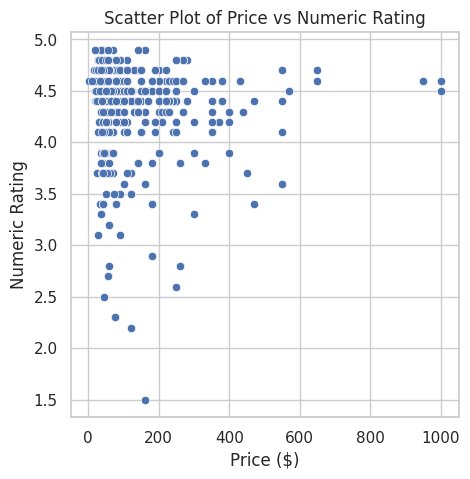

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plot
sns.set(style="whitegrid")

# Creating a scatter plot for Price vs Numeric Rating
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Price', y='Numeric Rating', data=df)

plt.title('Scatter Plot of Price vs Numeric Rating')
plt.xlabel('Price ($)')
plt.ylabel('Numeric Rating')
plt.show()


In [43]:
# prompt: sub category uniqu

unique_sub_categories = df['Sub Category'].unique()
print(unique_sub_categories)


['Bakery & Desserts' 'Beverages & Water' 'Breakfast' 'Candy'
 'Cleaning Supplies' 'Coffee' 'Deli' 'Floral' 'Gift Baskets' 'Household'
 'Kirkland Signature Grocery' 'Laundry Detergent & Supplies'
 'Meat & Seafood' 'Organic' 'Pantry & Dry Goods'
 'Paper & Plastic Products' 'Poultry' 'Seafood' 'Snacks']


In [44]:
# prompt: sub category value counts

sub_category_counts = df['Sub Category'].value_counts()

print(sub_category_counts)


Snacks                          293
Pantry & Dry Goods              171
Candy                           154
Beverages & Water               148
Meat & Seafood                  144
Kirkland Signature Grocery      122
Coffee                           95
Cleaning Supplies                94
Gift Baskets                     89
Paper & Plastic Products         88
Household                        81
Floral                           75
Seafood                          47
Laundry Detergent & Supplies     39
Organic                          33
Bakery & Desserts                33
Deli                             21
Breakfast                        21
Poultry                           9
Name: Sub Category, dtype: int64


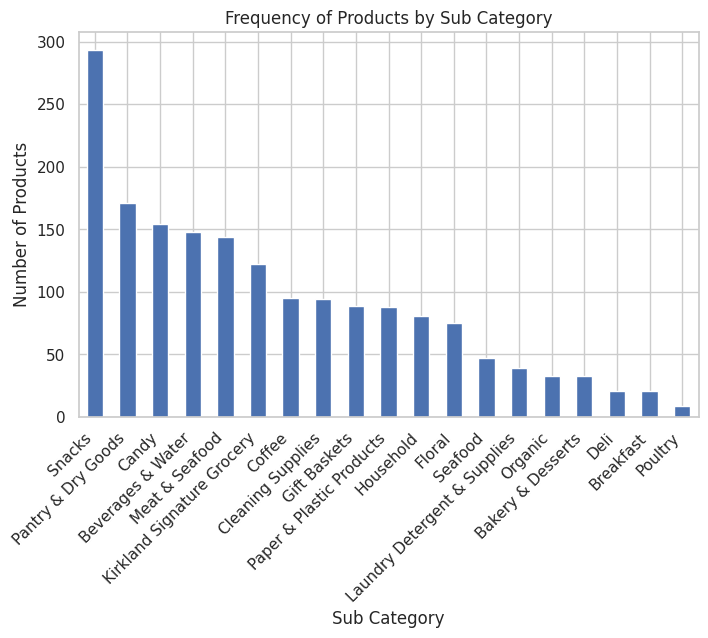

Snacks                          293
Pantry & Dry Goods              171
Candy                           154
Beverages & Water               148
Meat & Seafood                  144
Kirkland Signature Grocery      122
Coffee                           95
Cleaning Supplies                94
Gift Baskets                     89
Paper & Plastic Products         88
Household                        81
Floral                           75
Seafood                          47
Laundry Detergent & Supplies     39
Organic                          33
Bakery & Desserts                33
Deli                             21
Breakfast                        21
Poultry                           9
Name: Sub Category, dtype: int64

In [48]:
# Calculating the frequency of products by Sub Category
sub_category_counts = df['Sub Category'].value_counts()

# Plotting the frequencies
plt.figure(figsize=(8, 5))
sub_category_counts.plot(kind='bar')
plt.title('Frequency of Products by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.show()

sub_category_counts



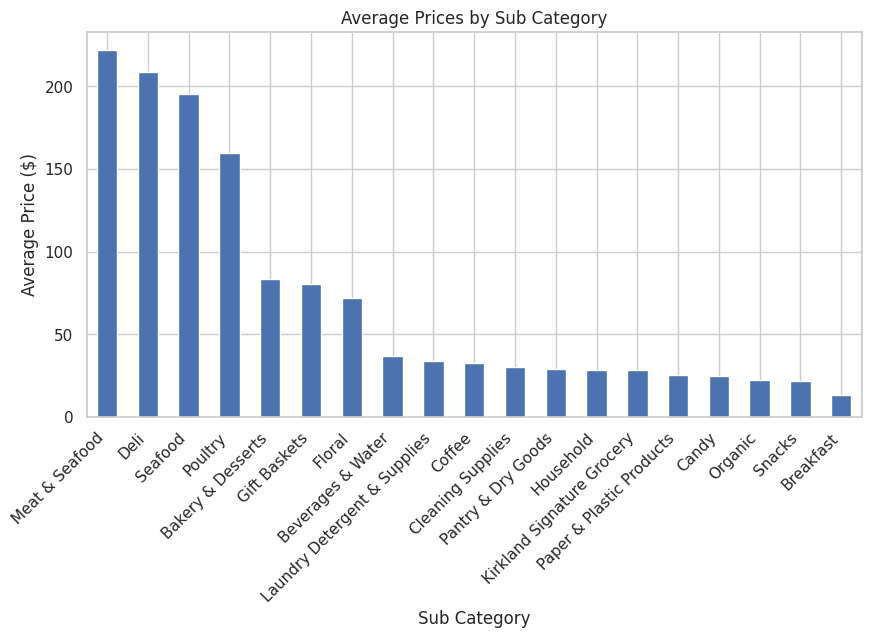

Sub Category
Meat & Seafood                  221.885035
Deli                            208.895714
Seafood                         195.521489
Poultry                         159.990000
Bakery & Desserts                83.414242
Gift Baskets                     80.563258
Floral                           71.976667
Beverages & Water                36.703514
Laundry Detergent & Supplies     33.895128
Coffee                           32.880526
Cleaning Supplies                30.357021
Pantry & Dry Goods               29.103450
Household                        28.335679
Kirkland Signature Grocery       28.119508
Paper & Plastic Products         25.344545
Candy                            25.069221
Organic                          22.420303
Snacks                           21.535890
Breakfast                        13.304286
Name: Price, dtype: float64

In [50]:
# Analyzing prices by subcategory
price_by_subcategory = df.groupby('Sub Category')['Price'].mean().sort_values(ascending=False)

# Plotting the average prices by subcategory
plt.figure(figsize=(10, 5))
price_by_subcategory.plot(kind='bar')
plt.title('Average Prices by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

price_by_subcategory



In [ ]:
# Classifying products into discounted and non-discounted
df['Has Discount'] = df['Discount'] != 'No Discount'

# Calculating the average numeric rating for discounted and non-discounted products
average_rating_by_discount = df.groupby('Has Discount')['Numeric Rating'].mean()

# Plotting the comparison
average_rating_by_discount.plot(kind='bar')
plt.title('Average Numeric Rating by Discount Status')
plt.xlabel('Has Discount')
plt.ylabel('Average Numeric Rating')
plt.xticks([0, 1], ['No Discount', 'Discount'], rotation=0)
plt.show()

average_rating_by_discount



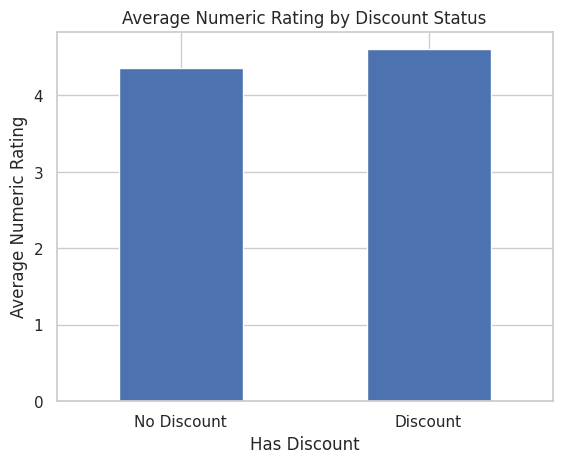

Has Discount
False    4.356874
True     4.603448
Name: Numeric Rating, dtype: float64

In [52]:
# Classifying products into discounted and non-discounted
df['Has Discount'] = df['Discount'] != 'No Discount'

# Calculating the average numeric rating for discounted and non-discounted products
average_rating_by_discount = df.groupby('Has Discount')['Numeric Rating'].mean()

# Plotting the comparison
average_rating_by_discount.plot(kind='bar')
plt.title('Average Numeric Rating by Discount Status')
plt.xlabel('Has Discount')
plt.ylabel('Average Numeric Rating')
plt.xticks([0, 1], ['No Discount', 'Discount'], rotation=0)
plt.show()

average_rating_by_discount



In [ ]:
!pip install nltk

In [59]:


import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Descargar las palabras vacías
nltk.download('stopwords')
nltk.download('wordnet')

# Función para preprocesar el texto
def preprocess(text):
    # Convierte el texto a minúsculas
    text = text.lower()
    # Tokenización y eliminación de palabras vacías
    tokens = [word for word in nltk.word_tokenize(text) if word.isalpha() and word not in stopwords.words('english')]
    # Lematización (opcional)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [60]:
# Función para calcular el sentimiento
def calculate_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Devuelve un valor entre -1 (negativo) y 1 (positivo)



In [64]:
df['Product Description'] = df['Product Description'].astype(str)
df['cleaned_description'] = df['Product Description'].apply(preprocess)
df['sentiment'] = df['cleaned_description'].apply(calculate_sentiment)


In [65]:
df['sentiment']


0       0.258333
1       0.404420
2       0.098512
3       0.233036
4       0.287500
          ...   
1752    0.000000
1753    0.000000
1754    0.000000
1755    0.000000
1756    0.094444
Name: sentiment, Length: 1757, dtype: float64

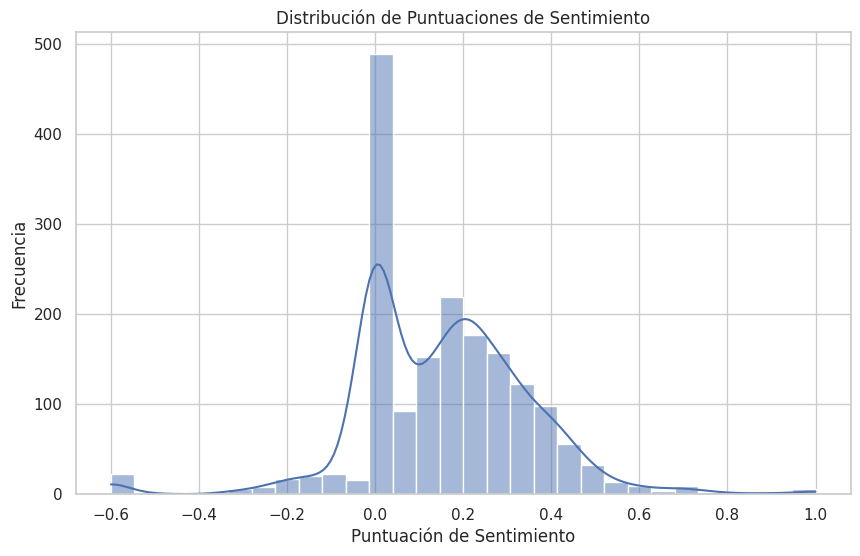

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Distribución de Puntuaciones de Sentimiento')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()


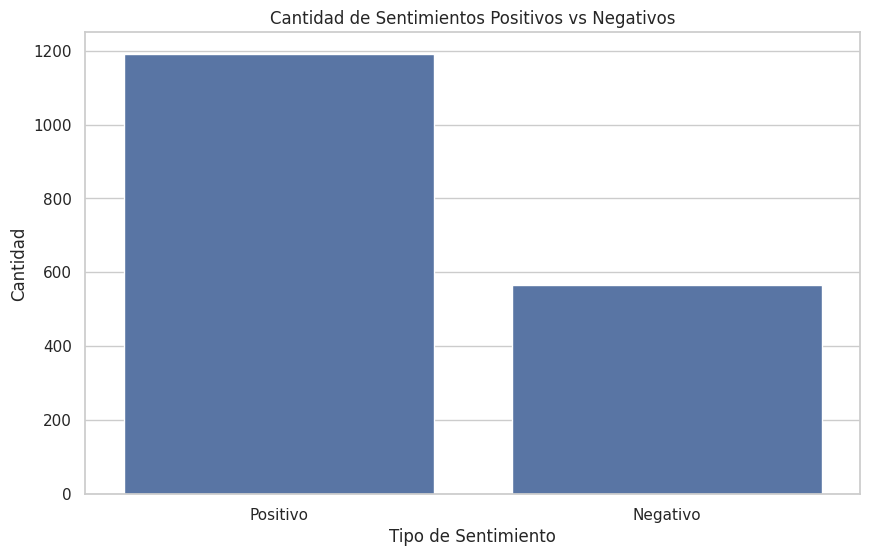

In [69]:
# Clasificar las puntuaciones como positivas o negativas
df['sentiment_type'] = ['Positivo' if score > 0 else 'Negativo' for score in df['sentiment']]

# Contar los tipos de sentimiento
sentiment_counts = df['sentiment_type'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Cantidad de Sentimientos Positivos vs Negativos')
plt.xlabel('Tipo de Sentimiento')
plt.ylabel('Cantidad')
plt.show()
